In [1]:
import matplotlib.pyplot as plt
import scipy.integrate
import numpy as np

In [2]:
def orbitODE(time, state, centerObjectMass, G):
    #center object is as pos (0, 0)
    #state = (x, y, xV, yV)
    x, y = state[0], state[1]
    xV, yV = state[2], state[3]
    m = centerObjectMass
    rmag_cubed = (x**2 + y**2)**(3/2)
    
    x_dot = xV
    y_dot = yV
    xV_dot = -(G*m*x)/rmag_cubed
    yV_dot = -(G*m*y)/rmag_cubed
    
    return (x_dot, y_dot, xV_dot, yV_dot) #state_dot

In [7]:
def get_trajectory(time_range, time_step, init_state, centerMass, G):
    times_to_save = np.linspace(time_range[0], time_range[1], 1000)
    solved = scipy.integrate.solve_ivp(orbitODE, time_range, init_state, args=(centerMass, G), t_eval=times_to_save, max_step = time_step)
    time = solved.t
    x = solved.y[0]
    y = solved.y[1]
    return (x, y)

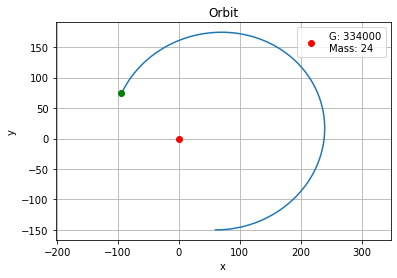

In [8]:
G = 334000
centerMass = 24
init = [60, -150, 231, 0]

x, y = get_trajectory((0, 4), 0.01, init, centerMass, G)

plt.title('Orbit')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.plot(x, y)
plt.plot(0, 0, 'ro', label=f'G: {G}\nMass: {centerMass}') #center object
plt.plot(x[-1], y[-1], 'go') #orbiting object
plt.legend()
plt.show()

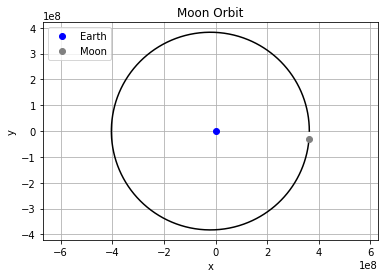

In [12]:
G = 6.67430 * 10**(-11)
earthMass = 5.972 * 10**(24) # kg
moon_perigee = 363104 * 1000 # km to m
moon_perigee_velocity = 1.075 * 1000 # km/s to m/s

init = [moon_perigee, 0, 0, moon_perigee_velocity]

period_of_moon = 27 * (24 * 60 * 60) # days to seconds
time_step = 0.1 * (60 * 60) # hours to seconds

x, y = get_trajectory((0, period_of_moon), time_step, init, earthMass, G)

plt.title('Moon Orbit')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.plot(x, y, color = 'black')
plt.plot(0, 0, 'bo', label="Earth") #center object
plt.plot(x[-1], y[-1], color = 'grey', linestyle='none', marker='o', label = "Moon") #orbiting object
plt.legend(loc = 2)
plt.show()